In [12]:
import pypowsybl as pp

Load CGMES micro grids BE and NL

In [13]:
be = pp.network.load('data/MicroGridTestConfiguration_T4_BE_BB_Complete_v2.zip')
nl = pp.network.load('data/MicroGridTestConfiguration_T4_NL_BB_Complete_v2.zip')

Save network ids

In [14]:
be_id = be.id
nl_id = nl.id

Display the two networks

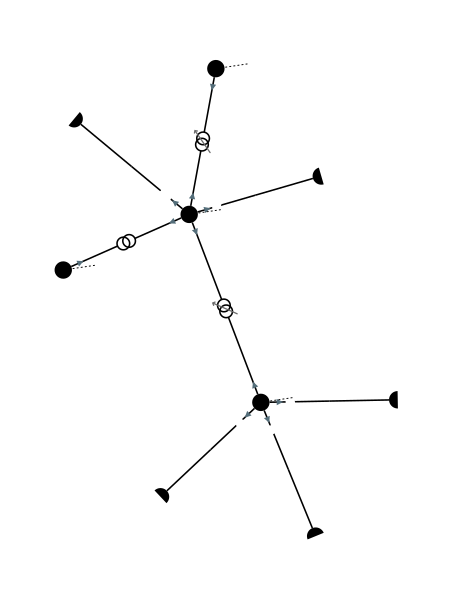

In [15]:
nl.get_network_area_diagram()

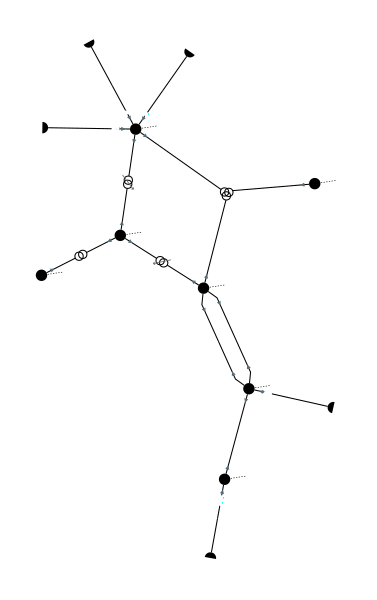

In [16]:
be.get_network_area_diagram()

Display the substations of the two networks

In [17]:
be.get_substations()

,name,TSO,geo_tags,country
id,,,,
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE


In [18]:
nl.get_substations()

,name,TSO,geo_tags,country
id,,,,
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


Display dangling lines information

In [23]:
be.get_dangling_lines()

,name,r,x,g,b,p0,q0,p,q,i,voltage_level_id,bus_id,connected,ucte-x-node-code,tie_line_id
id,,,,,,,,,,,,,,,
17086487-56ba-4979-b8de-064025a6b4da,BE-Line_1,2.20,68.2,0.000031,0.000083,-85.058722,0.789714,-83.212713,6.429361,215.660081,d0486169-2205-40b2-895e-b672ecb9e5fc,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,TN_Border_ST23,
78736387-5f60-4832-b3fe-d50daf81b0a6,BE-Line_3,1.05,12.0,0.000060,0.000150,-12.823174,63.626944,-2.553725,38.205621,53.384392,469df5f7-058f-4451-a998-57a48e8a56fe,469df5f7-058f-4451-a998-57a48e8a56fe_0,True,TN_Border_AL11,
b18cd1aa-7808-49b9-a7cf-605eaf07b006,BE-Line_5,0.42,6.3,0.000042,0.000066,-24.647174,120.204607,-17.441133,109.441001,154.505943,469df5f7-058f-4451-a998-57a48e8a56fe,469df5f7-058f-4451-a998-57a48e8a56fe_0,True,TN_Border_GY11,
a16b4a6c-70b1-4abf-9a9d-bd0fa47f9fe4,BE-Line_7,4.60,69.0,0.000058,0.000022,-106.135567,10.745724,-102.221014,25.123197,271.996673,69ef0dbd-da79-4eef-a02f-690cb8a28361,69ef0dbd-da79-4eef-a02f-690cb8a28361_0,True,TN_Border_ST24,
ed0c5d75-4a54-43c8-b782-b20d7431630b,BE-Line_4,0.24,2.0,0.000040,0.000025,-7.631551,66.838069,-0.771180,62.569570,87.239905,469df5f7-058f-4451-a998-57a48e8a56fe,469df5f7-058f-4451-a998-57a48e8a56fe_0,True,TN_Border_MA11,


In [20]:
nl.get_dangling_lines()

,name,r,x,g,b,p0,q0,p,q,i,voltage_level_id,bus_id,connected,ucte-x-node-code,tie_line_id
id,,,,,,,,,,,,,,,
8fdc7abd-3746-481a-a65e-3df56acd8b13,NL-Line_4,2.20,66.00,0.000024,0.000090,85.058722,-0.789714,86.593318,4.487378,223.293280,c1d5bfea8f8011e08e4d00247eb1f55e,c1d5bfea8f8011e08e4d00247eb1f55e_0,True,TN_Border_ST23,
7f43f508-2496-4b64-9146-0a40406cbe49,NL-Line_1,1.02,12.00,0.000030,0.000141,12.823174,-63.626944,17.940651,-87.154106,125.152112,c1d5bfde8f8011e08e4d00247eb1f55e,c1d5bfde8f8011e08e4d00247eb1f55e_0,True,TN_Border_AL11,
e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc,NL-Line_5,0.42,6.30,0.000035,0.000065,24.647174,-120.204607,30.612926,-130.572715,188.629870,c1d5bfde8f8011e08e4d00247eb1f55e,c1d5bfde8f8011e08e4d00247eb1f55e_0,True,TN_Border_GY11,
a279a3dc-550b-426c-af3a-61b7be508dcc,NL-Line_3,5.06,69.00,0.000023,0.000020,106.135567,-10.745724,108.458353,4.331245,279.523255,c1d5bfea8f8011e08e4d00247eb1f55e,c1d5bfea8f8011e08e4d00247eb1f55e_0,True,TN_Border_ST24,
dad02278-bd25-476f-8f58-dbe44be72586,NL-Line_2,2.32,20.24,0.000040,0.000025,7.631551,-66.838069,14.492448,-70.530293,101.273121,c1d5bfde8f8011e08e4d00247eb1f55e,c1d5bfde8f8011e08e4d00247eb1f55e_0,True,TN_Border_MA11,


Merge the NL into BE

In [9]:
be.merge(nl)
eu = be

Get all substations as a Pandas data frame

In [28]:
eu.get_substations()

,name,TSO,geo_tags,country
id,,,,
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


Display the merged network

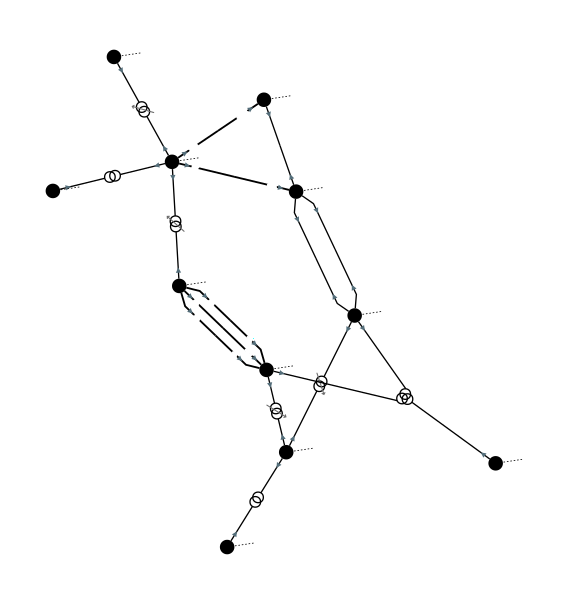

In [30]:
eu.get_network_area_diagram()

Display the substations of each subnetwork

In [43]:
eu.get_sub_network(nl_id).get_substations()

,name,TSO,geo_tags,country
id,,,,
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


In [48]:
eu.get_sub_network(be_id).get_substations()

,name,TSO,geo_tags,country
id,,,,
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE


Run an AC load flow

In [31]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=7, slack_bus_id='8d8a82ba-b5b0-4e94-861a-192af055f2b8_0', slack_bus_active_power_mismatch=-0.6422369117352389, distributed_active_power=-42.673095391236956)]

Get active power setpoint of generator 3a3b27be-b18b-4385-b557-6735d733baf0

In [32]:
generators = eu.get_generators()
generators['target_p']['3a3b27be-b18b-4385-b557-6735d733baf0']

90.0

Update active power setpoint to 100 MW

In [33]:
eu.update_generators(id='3a3b27be-b18b-4385-b557-6735d733baf0', target_p=100)

Check active power setpoint has been updated

In [34]:
generators = eu.get_generators()
generators['target_p']['3a3b27be-b18b-4385-b557-6735d733baf0']

100.0

Re-run AC load flow with new setpoint

In [35]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=8, slack_bus_id='8d8a82ba-b5b0-4e94-861a-192af055f2b8_0', slack_bus_active_power_mismatch=-0.6272105137655082, distributed_active_power=-52.78624579322459)]

Get generators data frame

In [11]:
eu.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
3a3b27be-b18b-4385-b557-6735d733baf0,BE-G1,OTHER,100.000000,50.0,200.0,NaN,NaN,300.0,CURVE,115.50000,100.256000,True,a708c3bc-465d-4fe7-b6ef-6fa6408a62b0,-94.443553,68.919797,6496.355890,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386_0,True
550ebe0d-f2b2-48c1-991f-cebea43a21aa,BE-G2,OTHER,118.000000,50.0,200.0,-200.0,200.0,300.0,MIN_MAX,21.98700,18.720301,True,550ebe0d-f2b2-48c1-991f-cebea43a21aa,-112.443553,-81.242496,3642.670548,929ba893-c9dc-44d7-b1fd-30834bd3ab85,929ba893-c9dc-44d7-b1fd-30834bd3ab85_0,True
2844585c-0d35-488d-a449-685bcd57afbf,NL-G2,OTHER,140.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,77.743000,True,2844585c-0d35-488d-a449-685bcd57afbf,-133.054441,-12.062895,4815.537613,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
1dc9afba-23b5-41a0-8540-b479ed8baf4b,NL-G3,OTHER,150.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,83.296000,True,1dc9afba-23b5-41a0-8540-b479ed8baf4b,-143.054441,-12.062895,5174.611746,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
9c3b8f97-7972-477d-9dc8-87365cc0ad0e,NL-G1,OTHER,600.492701,300.0,1000.0,0.0,600.0,1100.0,MIN_MAX,16.03350,386.922556,True,9c3b8f97-7972-477d-9dc8-87365cc0ad0e,-572.710466,-219.557302,22086.249972,8d8a82ba-b5b0-4e94-861a-192af055f2b8,8d8a82ba-b5b0-4e94-861a-192af055f2b8_0,True


Get lines data frame

In [12]:
eu.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
b58bf21a-096a-4dae-9a01-3f03b60c24c7,BE-Line_2,1.935,34.200000,0.000034,0.000021,0.000034,0.000021,-112.817075,15.284009,293.200271,116.712373,-8.302310,302.430897,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,d0486169-2205-40b2-895e-b672ecb9e5fc,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True
df16b3dd-c905-4a6f-84ee-f067be86f5da,SER-RLC-1230822986,0.000,-31.830989,0.000000,0.000000,0.000000,0.000000,-96.865526,17.198651,254.285899,96.865526,-23.373352,254.285899,d0486169-2205-40b2-895e-b672ecb9e5fc,69ef0dbd-da79-4eef-a02f-690cb8a28361,d0486169-2205-40b2-895e-b672ecb9e5fc_0,69ef0dbd-da79-4eef-a02f-690cb8a28361_0,True,True
ffbabc27-1ccd-4fdc-b037-e341706c8d29,BE-Line_6,5.203,71.000000,0.000060,0.000010,0.000060,0.000010,-51.946479,8.279455,135.470171,58.276300,-4.905005,151.160426,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,d0486169-2205-40b2-895e-b672ecb9e5fc,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True


Run sensitivity analysis:
 - node (generator 3a3b27be-b18b-4385-b557-6735d733baf0) to slack
 - zone (BE) to slack
 - zone (BE) to zone (NL) => PTDF

'b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc' is a BE/NL tieline

In [13]:
sa = pp.sensitivity.create_dc_analysis()
country_be = pp.sensitivity.create_country_zone(eu, 'BE')
country_nl = pp.sensitivity.create_country_zone(eu, 'NL')
sa.set_zones([country_be, country_nl])
sa.set_branch_flow_factor_matrix(branches_ids=['b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc'], variables_ids=['3a3b27be-b18b-4385-b557-6735d733baf0', 'BE', ('BE', 'NL')])
results = sa.run(eu)
results.get_branch_flows_sensitivity_matrix()

<enum 'ZoneKeyType'>
<enum 'ZoneKeyType'>
True
<enum 'ZoneKeyType'>
<enum 'ZoneKeyType'>
True


,b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc
3a3b27be-b18b-4385-b557-6735d733baf0,0.332024
BE,0.328701
BE -> NL,0.416422
